In [2]:
!pip install transformers
# tranformers패키지 설치 

In [3]:
!pip install matplotlib

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re

from math import pi
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sentiment Analysis에 필요한 패키지 Import 


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt --qq -y install fonts-NanumBarunGothic

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

# 그래프에 retina display 적용

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')  
fm._rebuild()

E: Command line option --qq is not understood in combination with the other options


구글 드라이브와 Colab을 연동합니다.

In [6]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

# 구글드라이브 마운트 

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [7]:
os.listdir('gdrive/My Drive/pytest')
# 지정된 경로에 파일을 출력 

['Sentiment Analysis Dataset.csv',
 'iris.csv',
 'test.csv',
 'ratings_morphed.txt',
 '김소월시.txt',
 '윤동주시.txt',
 'ratings.txt',
 'wiki_test.txt',
 'negative.txt',
 'positive.txt',
 'ratings_small.txt',
 'kor-eng',
 '네이버뉴스-생활문화_다중',
 'word2vec',
 'aclImdb_v1_small',
 'similarity',
 'fra-eng',
 'rathings_morphed.txt',
 'rathings.txt',
 'stopwords-ko.txt',
 '크롤링 20000개.csv',
 '학대별 라벨.xlsx',
 'bert',
 '위험별 척도 유형 200개씩.xlsx',
 'Child_Abuser.csv',
 '위험 척도 유형별 (1000개) .csv',
 '위험 척도 유형 (해당없음 제거) .csv',
 '학대별 라벨-중복제거.xlsx']

In [8]:
!apt-get update
!apt-get install g++ openjdk-8-jdk

# JDK Install 

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ 

In [9]:
!pip install JPype1==0.7.4
!pip install rhinoMorph
# JPype Install 
# 형태소 분석기 Rhino 사용 

In [10]:
import rhinoMorph
rn = rhinoMorph.startRhino()
# 설치된 Rhino를 임포트하고 시작하는 명렁어 

filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


In [11]:
df = pd.read_csv('gdrive/My Drive/pytest/위험 척도 유형 (해당없음 제거) .csv')
# 지정된 구글드라이브의 파일을 불러오기 

In [12]:
df['Label'].unique()
# 반응변수들의 고유한 범위를 파악 

array([1, 3, 4, 6, 2, 5])

In [13]:
df

,번호,내용,Label
0,1,친부에게 정당한 이유 없이 뺨을 맞아서 고막에 천공이 생겨 고막패치술을 받았습니다....,1
1,2,저는 스무살 여잔데 집에서 가정폭력이 일어나요어릴땐 신체적 폭력도 많이 당했는데 성...,1
2,3,제가 아직 청소년인데 가정폭력 신고를 제가 직접 경찰서에 가서 녹음본이나 사진들을 ...,1
3,4,남동생이 패륜아가 따로없네요밀치고 욕하고 공포심유발하듯 눈 뒤집으면서 말하고멱살잡고...,1
4,5,현재 21살대학생입니다.제목과 같이 현재 가정폭력으로 신고를 한 후 법원에서 벌금형...,1
...,...,...,...
6523,6524,\n\t\t\t\t\t\t쌤이 학생한테 욕하고 몽둥이로 머리세게 치고 뺨때리고 발로...,5
6524,6525,\n\t\t\t\t\t\t아빠가 공부에 민감하셔서 평소에는 아니더라도 공부할때는 진...,5
6525,6526,\n\t\t\t\t\t\t안녕하세요 일단 그리 심각한건아닌데여 저희 어머니와 누나가...,5
6526,6527,\n\t\t\t\t\t\t엄마가 동생보고 내가왜 너같은 자식을 키웠냐 괴물이다 그러...,5


In [14]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(doc))
        
    return doc

# 함수지정 
# 분석하고자 하는 텍스트에서 한글만을 추출 

In [15]:
# def text_tokenizing(doc):
#     return [word 
#             for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

# # 함수지정 
# # 형태소 분석기인 Rhino사용
# # 추가적으로 형태소분석을 한 결과가 불용어사전에 들어있거나 글자수가 1개이하인 결과들은 삭제 
# # Bert를 사용하지 않으면 이것을 사용하고 Bert는 tokenizing을 하지 않는 것이 좋은 결과를 내기 때문에 tokenizing을 사용하지 않음

In [16]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

# 함수지정 
# 불용어사전을 만들어주는 함수(for문을 통해 set형태로 하나씩 넣어줌)

SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt')
# 지정한 함수를 활용하여 구글드라이브에 불용어를 넣어놓은 텍스트파일을 불러옴 

In [17]:
a = []
for i in SW:
  a.append(i.replace("\n",""))
# 지정된 불용어사전이 \n이 추가되어 있기때문에 없애주는 작업 

In [18]:
SW = set()

In [19]:
for i in a:
  SW.add(i)

In [20]:
SW
# \n이 없어진것을 확인 

{'',
 'ㅋ',
 'ㅋㅋ',
 'ㅋㅋㅋ',
 'ㅎ',
 'ㅎㅎ',
 'ㅎㅎㅎ',
 'ㅠ',
 'ㅠㅠ',
 'ㅠㅠㅠ',
 'ㅡ',
 'ㅡㅡ',
 'ㅡㅡㅡ',
 '가',
 '가까스로',
 '가령',
 '가지',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '그',
 '그것',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리',
 '그리고',
 '그리하',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '근데',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '나오',
 '남들',
 '남짓',
 '내공',
 '너',
 '너무',
 '너희',
 '너희들',
 '네',
 '넷',
 '논하지 않다',
 '누가 알겠는가',
 '누구',
 '다니',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수

In [21]:
list1 = df.values.tolist()
# 불러왔던 df를 list형태로 변환해주며 list1이라는 객체에 저장 

In [22]:
Senti = []
for line in list1:
  Senti.append(line[2])
# 반응변수를 for문을 통해서 Senti라는 새롭게 만든 리스트에 넣어줌

In [23]:
Senti = pd.DataFrame(Senti)

Senti.rename(columns = { 0 : 'Label'}, inplace = True)
# Senti의 컬럼이름을 변경해줌 

In [24]:
labels = Senti['Label']
# labels에 Senti를 저장 
classes = sorted(labels.unique())
# classes에 Senti의 고유한 값을 저장 

In [25]:
label_to_cat = dict()
# 빈 딕셔너리 생성 

for i in range(len(classes)):
  dummy = np.zeros((len(classes),), dtype = 'int8')
  dummy[i] = 1
  label_to_cat[classes[i]] = dummy

# for문을 사용하여 Label을 더미변수로 변환 

label_to_cat

{1: array([1, 0, 0, 0, 0, 0], dtype=int8),
 2: array([0, 1, 0, 0, 0, 0], dtype=int8),
 3: array([0, 0, 1, 0, 0, 0], dtype=int8),
 4: array([0, 0, 0, 1, 0, 0], dtype=int8),
 5: array([0, 0, 0, 0, 1, 0], dtype=int8),
 6: array([0, 0, 0, 0, 0, 1], dtype=int8)}

In [26]:
y = np.array([label_to_cat[label] for label in Senti.Label])
# 변환된 것을 for문을 사용하여 array형태로 y에 저장 

In [27]:
b = []
for line in list1:
  b.append(text_cleaning(line[1]))

# 실제 텍스트가 있는 부분만을 cleaning작업 수행 

In [28]:
from sklearn.model_selection import train_test_split

train_text, test_text, train_senti, test_senti = train_test_split(b,y,test_size = 0.3, stratify = y)
# 비율에 맞게 train, test셋을 지정 

In [29]:
print(len(train_text))
print(len(train_senti))

4569
4569


### Kobert를 불러오기 

In [30]:
import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        self.max_len_single_sentence = self.max_len - 2  # take into account special tokens
        self.max_len_sentences_pair = self.max_len - 3  # take into account special tokens

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A RoBERTa sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A BERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

In [31]:
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')
# 미리 학습된 Kobert를 불러와서 tokenizer에 저장 
# Bert를 학습시키기 위해서는 많은 자원과 시간, 비용이 필요하기 때문에 직접 학습을 시키기에는 한계가 존재 

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1423: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,
Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.


### Train Text

In [32]:
 tokens, masks, segments = [], [], []
 SEQ_LEN = 256

 for i in train_text:
        # token : 문장을 토큰화함 
        i = i[:256]
        # 텍스트에서 256까지의 텍스트만 추출
        token = tokenizer.encode(i, max_length=SEQ_LEN, pad_to_max_length=True,truncation = True)
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        # mask는 글자가 있는 부분을 알려주는 것 
        segment = [0]*SEQ_LEN
        # segment는 첫문장인지 두번째 문장인지 파악하는 것
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [33]:
tokens = pad_sequences(tokens, value = 0, padding = 'post')
# 실제 텍스트를 임베딩하고 SEQ_LEN에 미치지 못하는 부분은 0으로 채우며 순서대로 임베딩
masks = np.array(masks)
# 실제 텍스트가 있는 부분을 말하며 array형태로 변환 
segments = np.array(segments)
# 첫문장인지 두번째 문장인지 파악하기 위한것이며 array형태로 변환 

train_X = [tokens, masks, segments]
# 위에서 변환된 것을 모델에 넣기 위해 하나의 리스트에 합쳐서 저장

In [34]:
print(len(train_X[0][0]))

256


### Test Text

In [35]:
 tokens, masks, segments = [], [], []
 SEQ_LEN = 256

 for i in test_text:
        # token : 문장을 토큰화함
        i = i[:256]
        # 텍스트에서 256까지의 텍스트만 추출
        token = tokenizer.encode(i, max_length=SEQ_LEN, pad_to_max_length=True,truncation = True)
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        # mask는 글자가 있는 부분을 알려주는 것         
        segment = [0]*SEQ_LEN
        # segment는 첫문장인지 두번째 문장인지 파악하는 것
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [36]:
tokens = pad_sequences(tokens, value = 0, padding = 'post')
# 실제 텍스트를 임베딩하고 SEQ_LEN에 미치지 못하는 부분은 0으로 채우며 순서대로 임베딩
masks = np.array(masks)
# 실제 텍스트가 있는 부분을 말하며 array형태로 변환 
segments = np.array(segments)
# 첫문장인지 두번째 문장인지 파악하기 위한것이며 array형태로 변환

test_X = [tokens, masks, segments]
# 위에서 변환된 것을 모델에 넣기 위해 하나의 리스트에 합쳐서 저장

In [37]:
# TPU 객체 만들기
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.72.139.66:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.72.139.66:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


### 모델 정의 

In [38]:
def create_sentiment_bert():
  # 버트 pretrained 모델 로드
  model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
  # 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
  # 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
  bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

  bert_outputs = bert_outputs[1]
  sentiment_first = tf.keras.layers.Dense(6, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02))(bert_outputs)
  # 반응변수의 고유한 값이 6개이므로 Output이 반응변수에 해당하는 각각의 확률을 도출
  sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
  # Optimizer : Adam, Metric : Accuracy
  sentiment_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'])
  return sentiment_model
# 함수 지정 
# 감성분석을 할 수 있는 Bert모델 생성 

In [39]:
train_senti = np.asarray(train_senti).astype(np.int32)
test_senti = np.asarray(test_senti).astype(np.int32)

# 모델에 넣기위해서는 정수인 array형태로 지정한 객체여야하기 때문에 이러한 과정을 하였음 

In [40]:
train_senti

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int32)

In [41]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', patience = 3)

# OverFitting을 막기위해서 EarlyStopping기능을 사용하여 Validation Loss가 올라가게 되면 학습을 종료시켜주는 기능을 지정 

In [42]:
len(train_X[0][0])

256

In [43]:
len(test_X[0][0])

256

In [44]:
print(len(test_X[0]))
print(len(train_X[0]))
print(len(train_senti))
print(len(test_senti))
# 모델을 학습하기전 길이가 맞는지 확인 

1959
4569
4569
1959


In [45]:
print(len(train_senti[0]))
print(len(test_senti[0]))
print(len(train_X[0][0]))
print(len(test_X[0][0]))

6
6
256
256


In [46]:
# sentiment_model = create_sentiment_bert()
# sentiment_model.fit(train_X, train_senti, epochs=3, shuffle=False, batch_size=20,validation_data= (test_X, test_senti),callbacks = [es])
# # sentiment_model.save_weights(os.path.join(path,"sentiment_model.h5"))
# # TPU를 사용하지 않을때 쓰는 코드 
# # TPU를 사용하지 않으면 학습에 매우 많은 시간이 소요되므로 TPU를 권장 

In [47]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
# TPU를 활용하기 위해 context로 묶어주기
with strategy.scope():
  
  sentiment_model = create_sentiment_bert()
  sentiment_model.fit(train_X, train_senti, epochs=20, shuffle=True, batch_size=10, validation_data= (test_X, test_senti),callbacks = [es])
  # sentiment_model.save_weights(os.path.join(path,"sentiment_model.h5"))

# 학습횟수 : 20, Batch_Size : 10으로 지정하여 학습하며 EarlyStopping 지정 

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/20
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


  2/457 [..............................] - ETA: 22s - loss: 1.8509 - accuracy: 0.2000WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0093s vs `on_train_batch_end` time: 0.0871s). Check your callbacks.


457/457 [==============================] - ETA: 0s - loss: 1.6498 - accuracy: 0.3149WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0040s vs `on_test_batch_end` time: 0.0235s). Check your callbacks.


457/457 [==============================] - 62s 136ms/step - loss: 1.6498 - accuracy: 0.3149 - val_loss: 1.3224 - val_accuracy: 0.4768
Epoch 2/20
457/457 [==============================] - 48s 106ms/step - loss: 1.2500 - accuracy: 0.5025 - val_loss: 1.0846 - val_accuracy: 0.5549
Epoch 3/20
457/457 [==============================] - 48s 106ms/step - loss: 1.0504 - accuracy: 0.5789 - val_loss: 1.0879 - val_accuracy: 0.5569
Epoch 4/20
457/457 [==============================] - 49s 107ms/step - loss: 0.9237 - accuracy: 0.6321 - val_loss: 1.0337 - val_accuracy: 0.5911
Epoch 5/20
457/457 [==============================] - 49s 108ms/step - loss: 0.8171 - accuracy: 0.6787 - val_loss: 1.1036 - val_accuracy: 0.6023
Epoch 6/20
457/457 [==============================] - 49s 108ms/step - loss: 0.7108 - accuracy: 0.7247 - val_loss: 1.0388 - val_accuracy: 0.6039
Epoch 7/20
457/457 [==============================] - 49s 108ms/step - loss: 0.6125 - accuracy: 0.7632 - val_loss: 1.0531 - val_accuracy: 0.6

In [48]:
preds = sentiment_model.predict(test_X)
# Train DataSet을 활용하여 학습한 모델에 실제 Test데이터를 넣어 나온 결과를 preds에 저장 

In [49]:
preds
# 출력된 결과들 
# output의 결과가 미리 지정한 6개의 결과로 나옴 

array([[0.16843538, 0.7746461 , 0.00855411, 0.0014698 , 0.04134514,
        0.00554948],
       [0.02653336, 0.0046666 , 0.9384936 , 0.00804808, 0.01949329,
        0.00276502],
       [0.6931376 , 0.07373271, 0.00780583, 0.00285365, 0.21903269,
        0.00343751],
       ...,
       [0.7081643 , 0.02365349, 0.0148777 , 0.0014977 , 0.00983034,
        0.24197647],
       [0.01281826, 0.00512942, 0.02289041, 0.42572972, 0.09950441,
        0.4339278 ],
       [0.96539915, 0.00326166, 0.01791588, 0.0034617 , 0.00539937,
        0.00456214]], dtype=float32)

In [50]:
from sklearn.metrics import classification_report

y_true = test_senti
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))
# 실제값과 추정값을 비교하여 각각의 통계적 결과를 도출 

              precision    recall  f1-score   support

           0       0.60      0.47      0.53       536
           1       0.48      0.50      0.49       241
           2       0.57      0.48      0.52       255
           3       0.84      0.74      0.79       285
           4       0.65      0.35      0.45       304
           5       0.87      0.84      0.85       338

   micro avg       0.67      0.56      0.61      1959
   macro avg       0.67      0.56      0.61      1959
weighted avg       0.67      0.56      0.60      1959
 samples avg       0.56      0.56      0.56      1959



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# def mean_answer_label(*preds):
#   preds_sum = np.zeros(preds[0].shape[0])
#   for pred in preds:
#     preds_sum += np.argmax(pred, axis=-1)
#   return np.round(preds_sum/len(preds), 0).astype(int)

In [64]:
def sentence_convert_data(data):
    global tokenizer
    tokens, masks, segments = [], [], []

    data = text_cleaning(data) # 이거

    token = tokenizer.encode(data, max_length=SEQ_LEN, pad_to_max_length=True)
    
    num_zeros = token.count(0) 
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros 
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]
# 함수지정 
# 사용자가 직접 입력한 텍스트를 Bert모델이 인식을 할 수 있도록 변환과정

def child_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = sentiment_model.predict(data_x)
    predict_value = np.ravel(predict)
 

    categories = ['아동기준 학대 심각성 및 지속성', '피해아동 특성','생활 환경','학대자기준 학대 심각성 및 지속성','학대 인식', '학대 행위자 특성']

    N = len(categories)

    values = np.round(predict, 3).flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.polar(angles, values)
    plt.fill(angles, values, alpha = 10.0)
    plt.xticks(angles[:-1], categories)

    plt.yticks([0,0.25,0.5,0.75,1.0])
    plt.ylim(0,1)
    
    plt.show()

# 함수지정 
# 변환된 데이터를 학습된 모델에 넣어 결과를 도출 
# 추가적으로 레이더차트를 출력하도록 하여 시각화에 도움 
    
    

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current fon

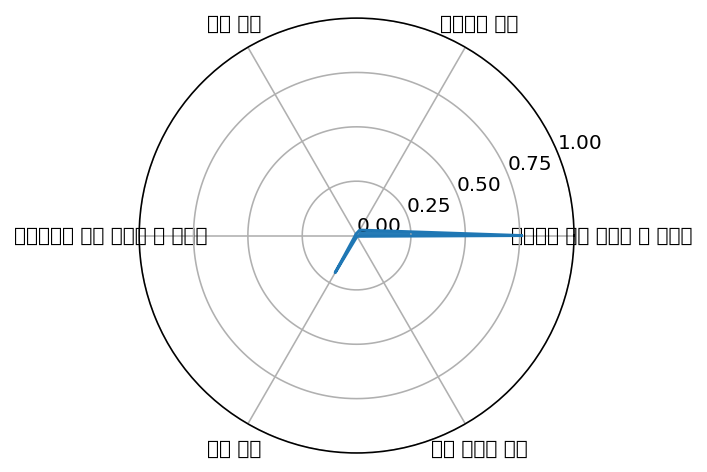

In [65]:
child_evaluation_predict("오늘 엄마랑 아빠랑 놀이동산에 놀러갔다. 추러스도 먹고 맛있는 핫도그도 먹고 재밌는 롤러코스터도 많이 탔다. 집에 돌아오는길에 차에서 토했는데 엄마랑 아빠가 왜그러냐며 뭐라하셨다. 속상했다")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current fon

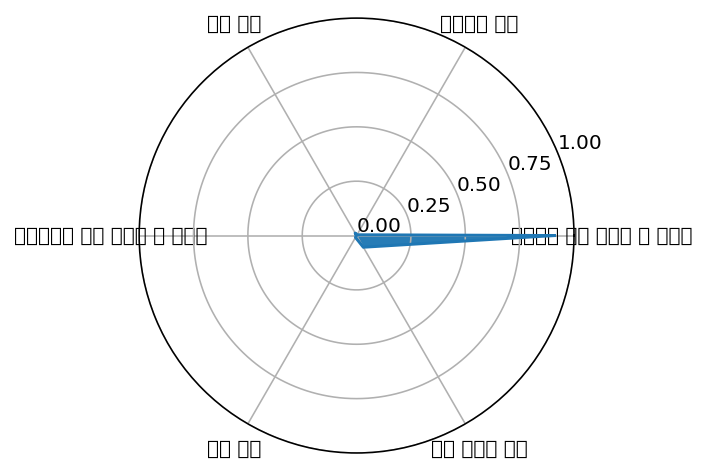

In [67]:
child_evaluation_predict("3일째 부모님이 술마시느라 집에 안들어오고 있고 전화를 해도 안받아요. 집에 먹을게 없어요... 라면을 어떻게 끓이는 건가요")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current fon

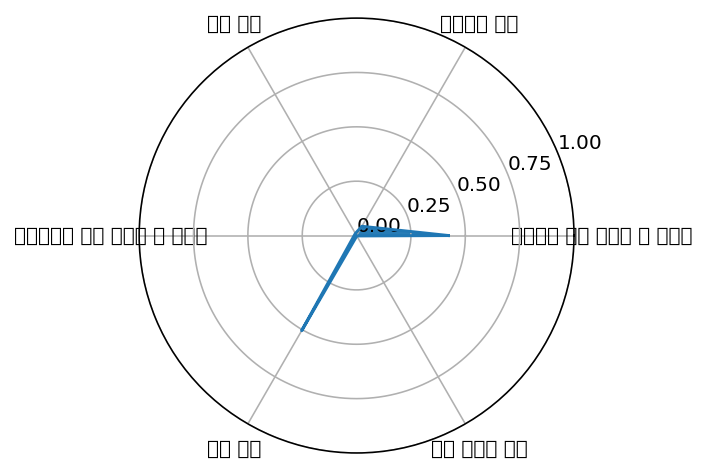

In [68]:
child_evaluation_predict("제가 방탄소년단 팬이여서 콘서트에 갈려고 티켓을 예매했는데 조금있으면 중간고사라 부모님이 저한테 욕을 하고 저의 자존심을 무너트리고 있어요.")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current fon

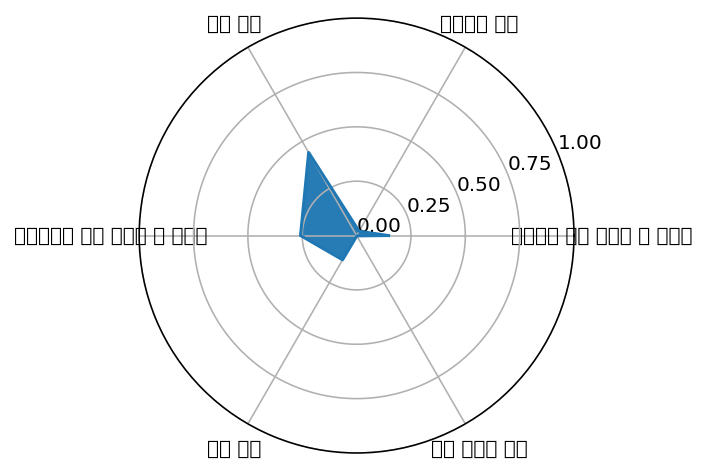

In [69]:
child_evaluation_predict("할아버지가 내가 너무 이쁘다며 내 몸 여러군데를 더듬는다. 그리고 장난으로 엉덩이나 가슴을 만지시는데 너무 불쾌하고 대처방안을 잘모르겠다.")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current fon

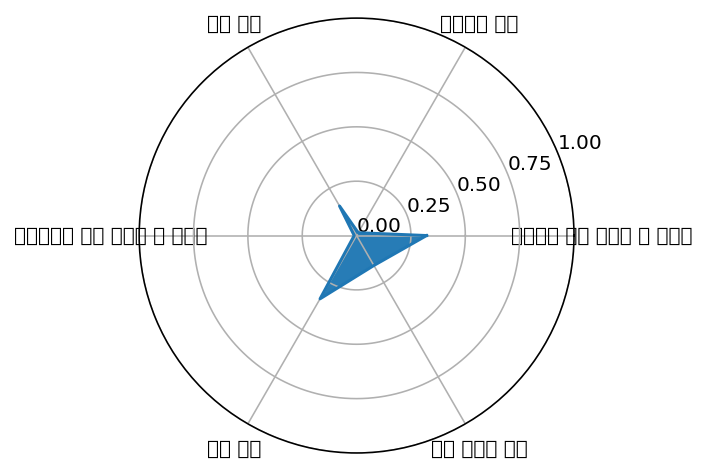

In [70]:
child_evaluation_predict("옆집에서 2일에 한번씩 큰소리가 나며 아이가 우는 소리와 맞는 소리가 들립니다. 또한 아이의 위생상태는 매우 좋지 않으며 집이 아주 더러우며 악취가 납니다.")